## 2. Data pre-processing
#### Step 1 - Data Cleaning 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("amazon reviews_MI.xlsx")
data.head()

,Unnamed: 0,stars,reviews,name
0,0,1,The media could not be loaded.\n ...,Ashraf
1,1,5,Febulas performance Redmi Note 8 ...I love it ...,Anil kumar sharma
2,2,5,best mobile under 10000,Mahendra
3,3,5,Redmi note 8 is the best Smartphone under 10k ...,Shah Arsalan
4,4,5,Loving the phone....Purchased with bank discou...,R.T


In [2]:
data.drop(columns=['Unnamed: 0', 'name'],inplace=True)
data.describe()

,stars
count,3100.000000
mean,3.584516
std,1.524550
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [3]:
data.shape

(3100, 2)

In [4]:
data.columns

Index(['stars', 'reviews'], dtype='object')

In [5]:
#Checking for null values
data.isnull().sum()

stars      0
reviews    1
dtype: int64

#### Removing punctuations, stopwords, URLs and emojis

In [6]:
# Convert text to lowercase
data['cleaned_reviews'] = data['reviews'].str.lower()

## removing punctuations
pattern = r"[^\w\s]"
data["cleaned_reviews"] = data["cleaned_reviews"].str.replace(pat=pattern, repl=" ", regex=True)
data.head(20)

,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,the media could not be loaded \n ...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 i love it ...
2,5,best mobile under 10000,best mobile under 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 is the best smartphone under 10k ...
4,5,Loving the phone....Purchased with bank discou...,loving the phone purchased with bank discou...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate so...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone under 10 000 specialy 18 watt...
7,5,Excellent phone in this price point 👌👌👌,excellent phone in this price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi has been a prominent smartphone brand wh...
9,5,I purchased it from redmi store. Its performan...,i purchased it from redmi store its performan...


In [7]:
# removing stopwords
data = data.dropna(thresh=3)
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
stopwords_set = set(stopwords)
cleaned_reviews = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.cleaned_reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_reviews.append(' '.join(words_without_stopwords))
    
data['cleaned_reviews'] = cleaned_reviews
data.head(20)

,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...
2,5,best mobile under 10000,best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...


In [8]:
# removing the accents
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

data["cleaned_reviews"] = data["cleaned_reviews"].apply(remove_accent)
data.head(20)

,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...
2,5,best mobile under 10000,best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...


In [9]:
# removing empty text spaces
print(data["reviews"].iloc[0])

data = data[data['cleaned_reviews']!='']
data.head(20)

The media could not be loaded.
                



 Phone hanged many times .I return it for replacement but not get back yet.Amazon shipping and replacement service is too bad. I uploaded a video....


,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...
2,5,best mobile under 10000,best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...


In [10]:
# removing hyperlinks
cleaned_reviews= []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.cleaned_reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

data['cleaned_reviews'] = cleaned_reviews
data.head(20)

,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...
2,5,best mobile under 10000,best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...


#### Step 2 - Tokenization

In [11]:
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
data['tokens'] = data.apply(lambda row: nltk.word_tokenize(row['cleaned_reviews']), axis=1)
data.head(10)

,stars,reviews,cleaned_reviews,tokens
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti..."
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f..."
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]"
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ..."
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb..."
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...,"[pros, batterycamerapricelookcons, delicate, h..."
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...,"[excellent, phone, 10, 000, specialy, 18, watt..."
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point,"[excellent, phone, price, point]"
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...,"[redmi, prominent, smartphone, brand, given, q..."
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...,"[purchased, redmi, store, performance, awesome..."


#### Step 3 - POS(part of speech) Labelling

In [12]:
nltk.download('wordnet')
from nltk.corpus import wordnet
pos_dict ={'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV,}
def token_pos(text):
    tags = pos_tag(text)
    newlist=[]
    for word,tag in tags:
        newlist.append(tuple([word,pos_dict.get(tag[0])]))
    return newlist

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tripti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
data['POS_Tagging'] = data['tokens'].apply(token_pos)
data.head(10)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti...","[(media, n), (could, None), (loaded, v), (phon..."
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f...","[(febulas, n), (performance, n), (redmi, v), (..."
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]","[(best, r), (mobile, a), (10000, None)]"
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ...","[(redmi, a), (note, n), (8, None), (best, a), ..."
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb...","[(loving, v), (phone, n), (purchased, v), (ban..."
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...,"[pros, batterycamerapricelookcons, delicate, h...","[(pros, n), (batterycamerapricelookcons, n), (..."
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...,"[excellent, phone, 10, 000, specialy, 18, watt...","[(excellent, a), (phone, n), (10, None), (000,..."
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point,"[excellent, phone, price, point]","[(excellent, a), (phone, n), (price, n), (poin..."
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...,"[redmi, prominent, smartphone, brand, given, q...","[(redmi, n), (prominent, a), (smartphone, n), ..."
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...,"[purchased, redmi, store, performance, awesome...","[(purchased, v), (redmi, n), (store, n), (perf..."


#### Step 4 - Lemmatization (getting the root words)

In [14]:
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew=" "
    for word,pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = word_lemmatizer.lemmatize(word,pos=pos)
            lemma_rew= lemma_rew + " "+ lemma
    return lemma_rew


In [15]:
data['Lemmas'] = data['POS_Tagging'].apply(lemmatize)
data.head(10)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging,Lemmas
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti...","[(media, n), (could, None), (loaded, v), (phon...",medium could load phone hang many time retur...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f...","[(febulas, n), (performance, n), (redmi, v), (...",febulas performance redmi note 8 love first ...
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]","[(best, r), (mobile, a), (10000, None)]",best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ...","[(redmi, a), (note, n), (8, None), (best, a), ...",redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb...","[(loving, v), (phone, n), (purchased, v), (ban...",love phone purchase bank discount 6gb 128gb ...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...,"[pros, batterycamerapricelookcons, delicate, h...","[(pros, n), (batterycamerapricelookcons, n), (...",pro batterycamerapricelookcons delicate hand...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...,"[excellent, phone, 10, 000, specialy, 18, watt...","[(excellent, a), (phone, n), (10, None), (000,...",excellent phone 10 000 specialy 18 watt fast...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point,"[excellent, phone, price, point]","[(excellent, a), (phone, n), (price, n), (poin...",excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...,"[redmi, prominent, smartphone, brand, given, q...","[(redmi, n), (prominent, a), (smartphone, n), ...",redmi prominent smartphone brand give qualit...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...,"[purchased, redmi, store, performance, awesome...","[(purchased, v), (redmi, n), (store, n), (perf...",purchase redmi store performance awesome sup...


## 4. Sentimental Analysis

In [16]:
# using VADER SentimentIntensityAnalyser to calculate the sentiment score
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in data['cleaned_reviews']]
data['sentiment_score'] = polarity
data.tail(5)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging,Lemmas,sentiment_score
3095,5,Gohead buy it guys.,gohead buy guys,"[gohead, buy, guys]","[(gohead, a), (buy, n), (guys, n)]",gohead buy guy,0.00
3096,5,Good product,good product,"[good, product]","[(good, a), (product, n)]",good product,0.44
3097,4,Good,good,[good],"[(good, a)]",good,0.44
3098,4,Battery back up is nothing like redmi note 4 b...,battery back nothing like redmi note 4 4000 ma...,"[battery, back, nothing, like, redmi, note, 4,...","[(battery, n), (back, r), (nothing, n), (like,...",battery back nothing like redmi note 4 4000 ...,-0.03
3099,5,Awesome phone in this range. Finger print read...,awesome phone range finger print reader workin...,"[awesome, phone, range, finger, print, reader,...","[(awesome, a), (phone, n), (range, n), (finger...",awesome phone range finger print reader work...,0.62


In [17]:
data['scores'] = data['cleaned_reviews'].apply(lambda review: sent.polarity_scores(review))
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
data.head(5)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging,Lemmas,sentiment_score,scores,compound,comp_score
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti...","[(media, n), (could, None), (loaded, v), (phon...",medium could load phone hang many time retur...,-0.42,"{'neg': 0.158, 'neu': 0.766, 'pos': 0.077, 'co...",-0.4215,neg
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f...","[(febulas, n), (performance, n), (redmi, v), (...",febulas performance redmi note 8 love first ...,0.91,"{'neg': 0.0, 'neu': 0.451, 'pos': 0.549, 'comp...",0.9081,pos
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]","[(best, r), (mobile, a), (10000, None)]",best mobile 10000,0.64,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,pos
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ...","[(redmi, a), (note, n), (8, None), (best, a), ...",redmi note 8 best smartphone 10k year 2019,0.64,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369,pos
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb...","[(loving, v), (phone, n), (purchased, v), (ban...",love phone purchase bank discount 6gb 128gb ...,0.99,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.9940,pos


In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['y'] = labelencoder.fit_transform(data['comp_score'])
data.head(5)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging,Lemmas,sentiment_score,scores,compound,comp_score,y
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti...","[(media, n), (could, None), (loaded, v), (phon...",medium could load phone hang many time retur...,-0.42,"{'neg': 0.158, 'neu': 0.766, 'pos': 0.077, 'co...",-0.4215,neg,0
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f...","[(febulas, n), (performance, n), (redmi, v), (...",febulas performance redmi note 8 love first ...,0.91,"{'neg': 0.0, 'neu': 0.451, 'pos': 0.549, 'comp...",0.9081,pos,1
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]","[(best, r), (mobile, a), (10000, None)]",best mobile 10000,0.64,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,pos,1
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ...","[(redmi, a), (note, n), (8, None), (best, a), ...",redmi note 8 best smartphone 10k year 2019,0.64,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369,pos,1
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb...","[(loving, v), (phone, n), (purchased, v), (ban...",love phone purchase bank discount 6gb 128gb ...,0.99,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.9940,pos,1


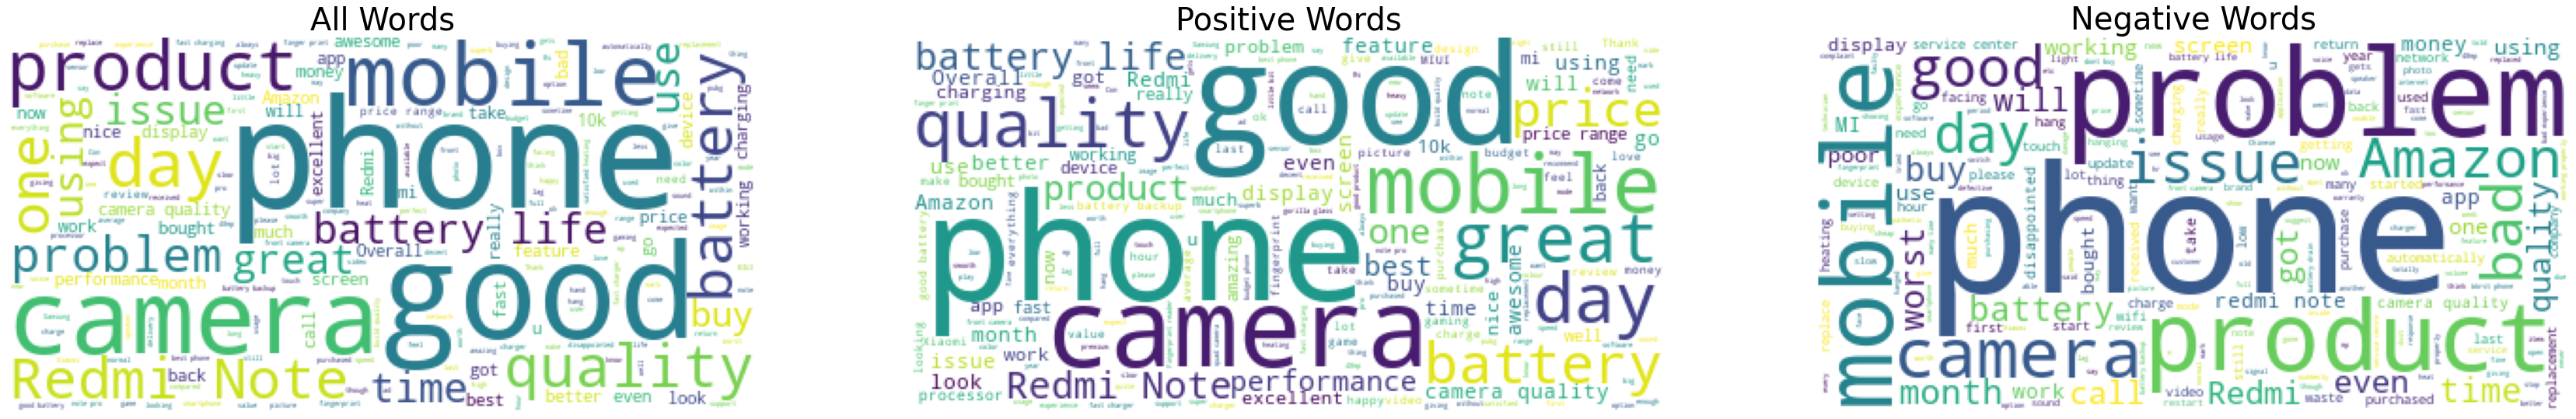

In [19]:
# Displaying word cloud
from wordcloud import WordCloud

All_word = ''.join(data['reviews'].tolist()) # All words in the given corpus
positive_words = ''.join(data[data['y']==1]['reviews'].tolist()) # All positive words
negative_words = ''.join(data[data['y']==0]['reviews'].tolist()) # All negative words
category = ['All Words','Positive Words','Negative Words']
data_wordcloud = [All_word,positive_words,negative_words]

plt.figure(figsize=(80,80))
for i in range(0,3):
    t=i+1
    plt.subplot(5, 4, t).set_title(category[i],fontsize=40)
    plt.axis('off')
    plt.imshow(WordCloud(background_color='white').generate(data_wordcloud[i]))
plt.savefig('Wordcloud.png')
plt.show()

In [20]:
data.y.value_counts()

1    2507
0     592
Name: y, dtype: int64

## 5. Feature Engineering 

In [21]:
# Bag of Words(BOW) Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text_counts= cv.fit_transform(data['cleaned_reviews'])
text_counts

<3099x8215 sparse matrix of type '<class 'numpy.int64'>'
	with 73725 stored elements in Compressed Sparse Row format>

In [22]:
# TFIDF Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tfidf_scores= tf.fit_transform(data['cleaned_reviews'])
tfidf_scores

<3099x8215 sparse matrix of type '<class 'numpy.float64'>'
	with 73725 stored elements in Compressed Sparse Row format>

## 6. Model Building 
 As we can see that our data was highly imbalanced in the previous unbalanced modelling notebook so we will try to balance the data using the oversampling technique where we will make the same count of negatives(0s) as positives(1s) for both feature extraction techniques

### SMOTE (Synthetic Minority Oversampling Technique)

 We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique) for handling data imbalance

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def scores(model):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    precision = precision_score(y_test_pred, y_test)
    print('Precision: %f' % precision)
    recall = recall_score(y_test_pred, y_test)
    print('Recall: %f' % recall)
    f1 = f1_score(y_test_pred, y_test)
    print('F1 score: %f' % f1)
    accuracy = accuracy_score(y_test_pred, y_test)
    print('Accuracy: %f' % accuracy)

### Model Building using Tf-IDF Feature extraction technique

In [25]:
y = data.y
X = tfidf_scores

In [26]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [27]:
#train-test split
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (4011, 8215)
train size y :  (4011,)
test size X :  (1003, 8215)
test size y :  (1003,)


In [28]:
# 1.Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

mnb_clf_tfidf = MultinomialNB().fit(X_train, y_train)
evaluate(mnb_clf_tfidf, X_train, X_test, y_train, y_test)
scores(mnb_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1961   40]
 [ 251 1759]]
ACCURACY SCORE:
0.9274
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.886528     0.977765   0.92745     0.932147      0.932249
recall        0.980010     0.875124   0.92745     0.927567      0.927450
f1-score      0.930928     0.923602   0.92745     0.927265      0.927257
support    2001.000000  2010.000000   0.92745  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[483  23]
 [ 98 399]]
ACCURACY SCORE:
0.8794
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.831325    0.945498  0.879362     0.888411      0.887899
recall       0.954545    0.802817  0.879362     0.878681      0.879362
f1-score     0.888684    0.868335  0.879362     0.878510      0.878601
support    506.000000  497.000000  0.879362  1003.000000   1003.000000
Precision: 0.802817
Recall: 0.945498
F1 score: 0.868335
Accuracy: 

In [29]:
# 2.ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
ex_tree_clf_tfidf = ExtraTreesClassifier(n_estimators=100, max_features=5, random_state=42)
ex_tree_clf_tfidf.fit(X_train, y_train)
evaluate(ex_tree_clf_tfidf, X_train, X_test, y_train, y_test)
scores(ex_tree_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2001    0]
 [   0 2010]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2001.0  2010.0       1.0     4011.0        4011.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[498   8]
 [ 31 466]]
ACCURACY SCORE:
0.9611
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.941399    0.983122  0.961117     0.962261      0.962073
recall       0.984190    0.937626  0.961117     0.960908      0.961117
f1-score     0.962319    0.959835  0.961117     0.961077      0.961088
support    506.000000  497.000000  0.961117  1003.000000   1003.000000
Precision: 0.937626
Recall: 0.983122
F1 score: 0.959835
Accuracy: 0.961117


In [30]:
# 3. AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf_tfidf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf_tfidf.fit(X_train, y_train)
evaluate(ada_boost_clf_tfidf, X_train, X_test, y_train, y_test)
scores(ada_boost_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1793  208]
 [ 119 1891]]
ACCURACY SCORE:
0.9185
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.937762     0.900905  0.918474     0.919333      0.919292
recall        0.896052     0.940796  0.918474     0.918424      0.918474
f1-score      0.916432     0.920419  0.918474     0.918425      0.918430
support    2001.000000  2010.000000  0.918474  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[441  65]
 [ 32 465]]
ACCURACY SCORE:
0.9033
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.932347    0.877358   0.90329     0.904853      0.905099
recall       0.871542    0.935614   0.90329     0.903578      0.903290
f1-score     0.900919    0.905550   0.90329     0.903235      0.903214
support    506.000000  497.000000   0.90329  1003.000000   1003.000000
Precision: 0.935614
Recall: 0.877358
F1 score: 0.905550
Accuracy: 

In [31]:
# 4. SVC 
from sklearn.svm import SVC
svm_clf_tfidf = SVC(gamma='scale')
svm_clf_tfidf.fit(X_train, y_train)
evaluate(svm_clf_tfidf, X_train, X_test, y_train, y_test)
scores(svm_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1999    2]
 [   3 2007]]
ACCURACY SCORE:
0.9988
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998501     0.999004  0.998753     0.998753      0.998754
recall        0.999000     0.998507  0.998753     0.998754      0.998753
f1-score      0.998751     0.998756  0.998753     0.998753      0.998753
support    2001.000000  2010.000000  0.998753  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[487  19]
 [ 10 487]]
ACCURACY SCORE:
0.9711
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.979879    0.962451  0.971087     0.971165      0.971243
recall       0.962451    0.979879  0.971087     0.971165      0.971087
f1-score     0.971087    0.971087  0.971087     0.971087      0.971087
support    506.000000  497.000000  0.971087  1003.000000   1003.000000
Precision: 0.979879
Recall: 0.962451
F1 score: 0.971087
Accuracy: 

In [32]:
# 5. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf_tfidf = DecisionTreeClassifier()
tree_clf_tfidf.fit(X_train, y_train)
evaluate(tree_clf_tfidf, X_train, X_test, y_train, y_test)
scores(tree_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2001    0]
 [   0 2010]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2001.0  2010.0       1.0     4011.0        4011.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[461  45]
 [ 58 439]]
ACCURACY SCORE:
0.8973
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.888247    0.907025  0.897308     0.897636      0.897551
recall       0.911067    0.883300  0.897308     0.897183      0.897308
f1-score     0.899512    0.895005  0.897308     0.897259      0.897279
support    506.000000  497.000000  0.897308  1003.000000   1003.000000
Precision: 0.883300
Recall: 0.907025
F1 score: 0.895005
Accuracy: 0.897308


In [33]:
# 6. GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf_tfidf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf_tfidf.fit(X_train, y_train)
evaluate(grad_boost_clf_tfidf, X_train, X_test, y_train, y_test)
scores(grad_boost_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1862  139]
 [  82 1928]]
ACCURACY SCORE:
0.9449
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.957819     0.932753  0.944902     0.945286      0.945258
recall        0.930535     0.959204  0.944902     0.944869      0.944902
f1-score      0.943980     0.945793  0.944902     0.944887      0.944889
support    2001.000000  2010.000000  0.944902  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[451  55]
 [ 39 458]]
ACCURACY SCORE:
0.9063
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.920408    0.892788  0.906281     0.906598      0.906722
recall       0.891304    0.921529  0.906281     0.906417      0.906281
f1-score     0.905622    0.906931  0.906281     0.906277      0.906271
support    506.000000  497.000000  0.906281  1003.000000   1003.000000
Precision: 0.921529
Recall: 0.892788
F1 score: 0.906931
Accuracy: 

In [34]:
# 7. LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg_tfidf = LogisticRegression(solver='liblinear')
log_reg_tfidf.fit(X_train, y_train)
evaluate(log_reg_tfidf, X_train, X_test, y_train, y_test)
scores(log_reg_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1962   39]
 [ 103 1907]]
ACCURACY SCORE:
0.9646
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.950121     0.979959  0.964597     0.965040      0.965073
recall        0.980510     0.948756  0.964597     0.964633      0.964597
f1-score      0.965076     0.964105  0.964597     0.964591      0.964590
support    2001.000000  2010.000000  0.964597  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[484  22]
 [ 49 448]]
ACCURACY SCORE:
0.9292
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.908068    0.953191  0.929212     0.930630      0.930427
recall       0.956522    0.901408  0.929212     0.928965      0.929212
f1-score     0.931665    0.926577  0.929212     0.929121      0.929144
support    506.000000  497.000000  0.929212  1003.000000   1003.000000
Precision: 0.901408
Recall: 0.953191
F1 score: 0.926577
Accuracy: 

### Model building using Bag of words(BOW) feature extraction technique

In [35]:
#train-test split
from sklearn.model_selection import train_test_split
y = data.y
X = text_counts
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train2.shape)
print("train size y : ",y_train2.shape)
print("test size X : ",X_test2.shape)
print("test size y : ",y_test2.shape)

train size X :  (4011, 8215)
train size y :  (4011,)
test size X :  (1003, 8215)
test size y :  (1003,)


In [36]:
# 1.  Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb_clf_bow = MultinomialNB().fit(X_train2, y_train2)
evaluate(mnb_clf_bow, X_train2,X_test2,y_train2,y_test2)
scores(mnb_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1345  656]
 [ 197 1813]]
ACCURACY SCORE:
0.7873
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.872244     0.734305  0.787335     0.803275      0.803120
recall        0.672164     0.901990  0.787335     0.787077      0.787335
f1-score      0.759244     0.809556  0.787335     0.784400      0.784456
support    2001.000000  2010.000000  0.787335  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[335 171]
 [ 72 425]]
ACCURACY SCORE:
0.7577
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.823096    0.713087  0.757727     0.768092      0.768585
recall       0.662055    0.855131  0.757727     0.758593      0.757727
f1-score     0.733844    0.777676  0.757727     0.755760      0.755564
support    506.000000  497.000000  0.757727  1003.000000   1003.000000
Precision: 0.776660
Recall: 0.881279
F1 score: 0.825668
Accuracy: 

In [37]:
# 2. ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
ex_tree_clf_bow = ExtraTreesClassifier(n_estimators=100, max_features=5, random_state=42)
ex_tree_clf_bow.fit(X_train2, y_train2)
evaluate(ex_tree_clf_bow, X_train2,X_test2,y_train2,y_test2)
scores(ex_tree_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2001    0]
 [   3 2007]]
ACCURACY SCORE:
0.9993
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998503     1.000000  0.999252     0.999251      0.999253
recall        1.000000     0.998507  0.999252     0.999254      0.999252
f1-score      0.999251     0.999253  0.999252     0.999252      0.999252
support    2001.000000  2010.000000  0.999252  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[436  70]
 [ 39 458]]
ACCURACY SCORE:
0.8913
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.917895    0.867424  0.891326     0.892659      0.892886
recall       0.861660    0.921529  0.891326     0.891595      0.891326
f1-score     0.888889    0.893659  0.891326     0.891274      0.891252
support    506.000000  497.000000  0.891326  1003.000000   1003.000000
Precision: 0.329980
Recall: 0.993939
F1 score: 0.495468
Accuracy: 

In [38]:
# 3. AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf_bow= AdaBoostClassifier(n_estimators=30)
ada_boost_clf_bow.fit(X_train2, y_train2)
evaluate(ada_boost_clf_bow,X_train2,X_test2,y_train2,y_test2)
scores(ada_boost_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1872  129]
 [ 309 1701]]
ACCURACY SCORE:
0.8908
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.858322     0.929508    0.8908     0.893915      0.893995
recall        0.935532     0.846269    0.8908     0.890900      0.890800
f1-score      0.895265     0.885938    0.8908     0.890601      0.890591
support    2001.000000  2010.000000    0.8908  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[467  39]
 [ 88 409]]
ACCURACY SCORE:
0.8734
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.841441    0.912946   0.87338     0.877194      0.876873
recall       0.922925    0.822938   0.87338     0.872931      0.873380
f1-score     0.880302    0.865608   0.87338     0.872955      0.873021
support    506.000000  497.000000   0.87338  1003.000000   1003.000000
Precision: 0.040241
Recall: 1.000000
F1 score: 0.077369
Accuracy: 

In [39]:
# 4. SVC
from sklearn.svm import SVC
svm_clf_bow = SVC(gamma='scale')
svm_clf_bow.fit(X_train2, y_train2)
evaluate(svm_clf_bow, X_train2,X_test2,y_train2,y_test2)
scores(svm_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1976   25]
 [ 100 1910]]
ACCURACY SCORE:
0.9688
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.951830     0.987080  0.968836     0.969455      0.969495
recall        0.987506     0.950249  0.968836     0.968878      0.968836
f1-score      0.969340     0.968314  0.968836     0.968827      0.968826
support    2001.000000  2010.000000  0.968836  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[448  58]
 [ 44 453]]
ACCURACY SCORE:
0.8983
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.910569    0.886497  0.898305     0.898533      0.898641
recall       0.885375    0.911469  0.898305     0.898422      0.898305
f1-score     0.897796    0.898810  0.898305     0.898303      0.898298
support    506.000000  497.000000  0.898305  1003.000000   1003.000000
Precision: 0.062374
Recall: 1.000000
F1 score: 0.117424
Accuracy: 

In [40]:
# 5. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf_bow = DecisionTreeClassifier()
tree_clf_bow.fit(X_train2, y_train2)
evaluate(tree_clf_bow, X_train2,X_test2,y_train2,y_test2)
scores(tree_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2001    0]
 [   3 2007]]
ACCURACY SCORE:
0.9993
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998503     1.000000  0.999252     0.999251      0.999253
recall        1.000000     0.998507  0.999252     0.999254      0.999252
f1-score      0.999251     0.999253  0.999252     0.999252      0.999252
support    2001.000000  2010.000000  0.999252  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[430  76]
 [ 65 432]]
ACCURACY SCORE:
0.8594
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.868687    0.850394  0.859422     0.859540      0.859622
recall       0.849802    0.869215  0.859422     0.859509      0.859422
f1-score     0.859141    0.859701  0.859422     0.859421      0.859419
support    506.000000  497.000000  0.859422  1003.000000   1003.000000
Precision: 0.052314
Recall: 1.000000
F1 score: 0.099426
Accuracy: 

In [41]:
# 6. GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf_bow = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf_bow.fit(X_train2, y_train2)
evaluate(grad_boost_clf_bow,X_train2,X_test2,y_train2,y_test2)
scores(grad_boost_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1915   86]
 [ 280 1730]]
ACCURACY SCORE:
0.9088
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.872437     0.952643  0.908751     0.912540      0.912630
recall        0.957021     0.860697  0.908751     0.908859      0.908751
f1-score      0.912774     0.904339  0.908751     0.908556      0.908547
support    2001.000000  2010.000000  0.908751  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[468  38]
 [ 76 421]]
ACCURACY SCORE:
0.8863
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.860294    0.917211  0.886341     0.888753      0.888497
recall       0.924901    0.847082  0.886341     0.885992      0.886341
f1-score     0.891429    0.880753  0.886341     0.886091      0.886139
support    506.000000  497.000000  0.886341  1003.000000   1003.000000
Precision: 0.032193
Recall: 1.000000
F1 score: 0.062378
Accuracy: 

In [42]:
# 7. LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg_bow = LogisticRegression(solver='liblinear')
log_reg_bow.fit(X_train2, y_train2)
evaluate(log_reg_bow, X_train2,X_test2,y_train2,y_test2)
scores(log_reg_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1993    8]
 [  58 1952]]
ACCURACY SCORE:
0.9835
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.971721     0.995918  0.983545     0.983820      0.983847
recall        0.996002     0.971144  0.983545     0.983573      0.983545
f1-score      0.983712     0.983375  0.983545     0.983544      0.983543
support    2001.000000  2010.000000  0.983545  4011.000000   4011.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[469  37]
 [ 56 441]]
ACCURACY SCORE:
0.9073
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.893333    0.922594  0.907278     0.907964      0.907832
recall       0.926877    0.887324  0.907278     0.907101      0.907278
f1-score     0.909796    0.904615  0.907278     0.907206      0.907229
support    506.000000  497.000000  0.907278  1003.000000   1003.000000
Precision: 0.110664
Recall: 1.000000
F1 score: 0.199275
Accuracy: 

## Deep Learning Model Building

In [43]:
from tensorflow import keras 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.utils import plot_model,to_categorical
from tqdm import autonotebook
from tensorflow.keras import regularizers

C:\Users\Tripti\AppData\Local\Temp\ipykernel_14288\3795715121.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm import autonotebook


In [44]:
#Preprocessing
epoch = 15
batch_size = 64

n_unique_words = 10000
n_dim = 64
max_input_len = 100
drop_emb = 0.3

n_lstm = 128
drop_lstm = 0.2

# n_filter = 64
# n_kernel = 3

In [45]:
X = data['reviews']
y = data['y']

In [46]:
xtrain, xval, ytrain, yval = train_test_split(X,y,test_size=0.2,random_state=45)

In [47]:
tokenizer = Tokenizer(n_unique_words+1)
tokenizer.fit_on_texts(xtrain)

xtrain = tokenizer.texts_to_sequences(xtrain)
xval = tokenizer.texts_to_sequences(xval)

xtrain_seq = sequence.pad_sequences(xtrain,maxlen=max_input_len)
xval_seq = sequence.pad_sequences(xval,maxlen=max_input_len)

ytrain = np.array(ytrain)  
yval = np.array(yval)


## Bi-directional LSTM Architecture

In [48]:
model = Sequential()
model.add(Embedding(n_unique_words,n_dim,input_length=max_input_len))
model.add(SpatialDropout1D(drop_emb))
model.add(Bidirectional(LSTM(n_lstm,recurrent_dropout=drop_lstm)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 64)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 256)              197632    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 837,889
Trainable params: 837,889
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

In [51]:
model_hist = model.fit(x=xtrain_seq,
                       y=ytrain,
                       validation_split=0.1,
                       batch_size=batch_size,
                       epochs=epoch,
                       verbose=0,
                       callbacks=[monitor])

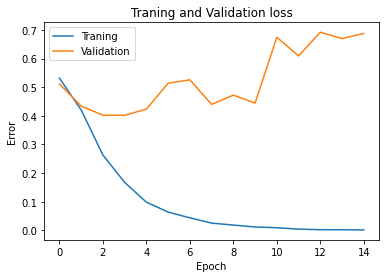

In [52]:
# Error
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Traning and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Traning','Validation'])
plt.show()

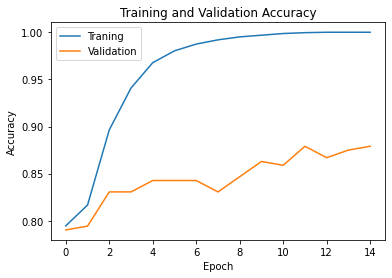

In [53]:
#Accuracy

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Traning','Validation'])
plt.show()

In [54]:
#Model evaluation and prediction
Score= model.evaluate(xval_seq,yval,verbose=0,callbacks=[monitor])
print(f'Loss:{Score[0]}')
print(f'Accuracy:{Score[1]}')
y_pred_model = model.predict(xval_seq)
precision = precision_score(yval,y_pred_model.ravel().round())
print('Precision: %f' % precision)
recall = recall_score(yval,y_pred_model.ravel().round())
print('Recall: %f' % recall)
f1 = f1_score(yval,y_pred_model.ravel().round())
print('F1 score: %f' % f1)
print(classification_report(yval,y_pred_model.ravel().round()))

Loss:0.6973341107368469
Accuracy:0.8806451559066772
20/20 [==============================] - 1s 26ms/step
Precision: 0.909266
Recall: 0.945783
F1 score: 0.927165
              precision    recall  f1-score   support

           0       0.74      0.61      0.67       122
           1       0.91      0.95      0.93       498

    accuracy                           0.88       620
   macro avg       0.82      0.78      0.80       620
weighted avg       0.88      0.88      0.88       620



### From the above results, we can see that SVC with TF-IDF vectorizer has the highest accuracy amongst all the other models! 

In [56]:
y_test_pred = svm_clf_tfidf.predict(X_test)
df=pd.DataFrame(y_test_pred)
df.value_counts()

1    506
0    497
dtype: int64

In [57]:
df2=pd.DataFrame(y_test)
df2.value_counts()

y
0    506
1    497
dtype: int64

In [58]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

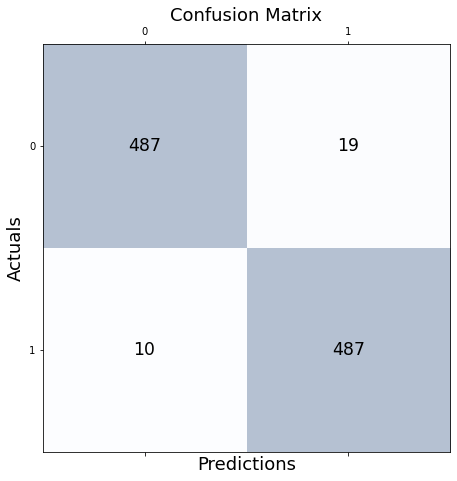

In [59]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()